In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
pixel_data= pd.read_csv("digit_svm.csv")

In [ ]:
pixel_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27532,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,243.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,253.0,186.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27533,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27534,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Digit 4')

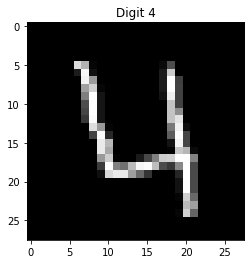

In [ ]:
four= pixel_data.iloc[3,1:]
four.shape
four= four.values.reshape(28,28)
plt.imshow(four,cmap='gray')
plt.title("Digit 4")

Text(0.5, 1.0, 'Digit 9')

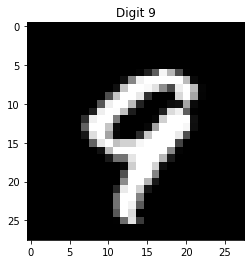

In [ ]:
nine=pixel_data.iloc[33,1:]
nine.shape
nine= nine.values.reshape(28,28)
plt.imshow(nine,cmap='gray')
plt.title("Digit 9")

In [ ]:
pixel_data.info

<bound method DataFrame.info of        label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          1       0       0       0  ...       0.0       0.0       0.0       0.0
1          0       0       0       0  ...       0.0       0.0       0.0       0.0
2          1       0       0       0  ...       0.0       0.0       0.0       0.0
3          4       0       0       0  ...       0.0       0.0       0.0       0.0
4          0       0       0       0  ...       0.0       0.0       0.0       0.0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
27531      0       0       0       0  ...       0.0       0.0       0.0       0.0
27532      7       0       0       0  ...       0.0       0.0       0.0       0.0
27533      7       0       0       0  ...       0.0       0.0       0.0       0.0
27534      8       0       0       0  ...       0.0       0.0       0.0       0.0
27535      8       0       0       0  ...       NaN       NaN     

In [ ]:
pixel_data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    1
pixel780    1
pixel781    1
pixel782    1
pixel783    1
Length: 785, dtype: int64

In [ ]:
pixel_data_copy=pixel_data

In [ ]:
pixel_data_copy=pixel_data.fillna (pixel_data_copy.mean())

In [ ]:
pixel_data_copy

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
27532,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,243.000000,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,95.00000,253.000000,186.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
27533,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [ ]:
y= pixel_data_copy['label']
x= pixel_data_copy.drop(columns='label')

In [ ]:
y

0        1
1        0
2        1
3        4
4        0
        ..
27531    0
27532    7
27533    7
27534    8
27535    8
Name: label, Length: 27536, dtype: int64

In [ ]:
print(pixel_data_copy.shape)

(27536, 785)


In [ ]:
from sklearn.preprocessing import scale  

x_scale= scale(x)

x_scale


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


In [ ]:
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(x_scale):
  x_train,x_test = x_scale[train_index],x_scale[test_index]
  y_train,y_test = y[train_index],y[test_index]

In [ ]:
from sklearn.svm import SVC

In [ ]:
linear_model = SVC(kernel='linear')
linear_model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred_y = linear_model.predict(x_test)


In [ ]:
pred_y

array([0, 5, 0, ..., 7, 3, 5])

In [ ]:
y_test

22029    0
22030    5
22031    0
22032    5
22033    9
        ..
27531    0
27532    7
27533    7
27534    8
27535    8
Name: label, Length: 5507, dtype: int64

In [ ]:
mat_y_test = y_test.iloc[:-1].values

In [ ]:
mat_y_test

array([0, 5, 0, ..., 7, 7, 8])

In [ ]:
pred_y-y_test

22029    0
22030    0
22031    0
22032    0
22033    0
        ..
27531    0
27532    0
27533    0
27534   -5
27535   -3
Name: label, Length: 5507, dtype: int64

In [ ]:
mat_error = (pred_y-y_test).iloc[:-1].values

In [ ]:
mat_error

array([ 0,  0,  0, ...,  0,  0, -5])

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
#linear model

accuracy_score(pred_y,y_test)


0.9126566188487379

In [ ]:
confusion_matrix(pred_y,y_test)

array([[520,   0,   1,   1,   4,   9,   9,   2,   5,   2],
       [  0, 571,   5,   5,   1,   2,   1,   3,  11,   3],
       [  4,   4, 512,  17,   8,   4,  12,   8,   6,   2],
       [  1,   2,  13, 489,   1,  23,   0,   7,  19,   7],
       [  1,   0,   7,   1, 518,   4,   0,  10,   3,  21],
       [  2,   0,   1,  20,   0, 421,  13,   0,  19,   0],
       [  5,   0,   4,   2,   3,  10, 512,   0,   6,   0],
       [  0,   2,   7,   7,   4,   0,   1, 546,   5,  15],
       [  3,   5,   6,  15,   1,  19,   2,   1, 453,   5],
       [  0,   0,   0,   6,  17,   2,   0,  18,   6, 484]])

In [ ]:
print(classification_report(pred_y,y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       553
           1       0.98      0.95      0.96       602
           2       0.92      0.89      0.90       577
           3       0.87      0.87      0.87       562
           4       0.93      0.92      0.92       565
           5       0.85      0.88      0.87       476
           6       0.93      0.94      0.94       542
           7       0.92      0.93      0.92       587
           8       0.85      0.89      0.87       510
           9       0.90      0.91      0.90       533

    accuracy                           0.91      5507
   macro avg       0.91      0.91      0.91      5507
weighted avg       0.91      0.91      0.91      5507



In [ ]:
non_linear_model = SVC(kernel='rbf')

In [ ]:
non_linear_model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred_y= non_linear_model.predict(x_test)

In [ ]:
pred_y= non_linear_model.predict(x_test)

In [ ]:
#non_linear_model
print(accuracy_score(pred_y,y_test))

0.9511530779008535


In [ ]:
print(confusion_matrix(pred_y,y_test))

[[520   0   1   1   4   9   9   2   5   2]
 [  0 571   5   5   1   2   1   3  11   3]
 [  4   4 512  17   8   4  12   8   6   2]
 [  1   2  13 489   1  23   0   7  19   7]
 [  1   0   7   1 518   4   0  10   3  21]
 [  2   0   1  20   0 421  13   0  19   0]
 [  5   0   4   2   3  10 512   0   6   0]
 [  0   2   7   7   4   0   1 546   5  15]
 [  3   5   6  15   1  19   2   1 453   5]
 [  0   0   0   6  17   2   0  18   6 484]]


In [ ]:
print(classification_report(pred_y,y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       553
           1       0.98      0.95      0.96       602
           2       0.92      0.89      0.90       577
           3       0.87      0.87      0.87       562
           4       0.93      0.92      0.92       565
           5       0.85      0.88      0.87       476
           6       0.93      0.94      0.94       542
           7       0.92      0.93      0.92       587
           8       0.85      0.89      0.87       510
           9       0.90      0.91      0.90       533

    accuracy                           0.91      5507
   macro avg       0.91      0.91      0.91      5507
weighted avg       0.91      0.91      0.91      5507

